In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from time import time
from sympy import symbols, Eq, solve

# Question 1

## Part a

The prey $Y_1$ is reproduce with rate $c_1$

$Y_1$  $\xrightarrow{c_1}$  2$Y_1$


When a prey and predator interact with predation rate $c_2$, the prey is consumed while predator left an offspring

$Y_1$ + $Y_2$ $\xrightarrow{c_2}$  2$Y_2$


The predators $Y_2$ is dying with rate $c_3$

$Y_2$ $\xrightarrow{c_3}$  $\varnothing$



### Differential Equation

$$\frac{dY_1(t)}{dt} = Y_1(t)[c_1 - c_2Y_2(t)] $$

$$\frac{dY_2(t)}{dt} = Y_2(t)[c_2Y_1(t) - c_3] $$

In this equation, the absence of predator, $Y_2=0$ gives us $\frac{dY_1(t)}{dt} = c_1Y_1(t)$ ($c_1>0$) which means the exponential growth of prey, since the model assumes the abundence of food for prey.
The prey could exist without predator.

## Part b

In [2]:
def LVM(c1=1,c2=0.005,c3=0.6,Y1_0=100,Y2_0=100,t=0,T=100):
    time = [0]
    
    prey=Y1_0
    predator=Y2_0
    
    prey_tracker=[Y1_0]
    predator_tracker=[Y2_0]
    while t < T:
        if (prey==0 or predator==0):
            break
        else :
            a=np.array([])

            prey_birth_rate=c1 * prey
            prey_death_rate= c2* prey * predator
            predator_birth_rate=c2* prey * predator
            predator_death_rate= c3 * predator  

            a=np.append(a,np.array([prey_birth_rate,prey_death_rate,predator_birth_rate,predator_death_rate]))
            a_sum=np.cumsum(a)  

            t += -np.log(np.random.rand()) / np.max(a_sum)
            time.append(t)

            reaction_index=np.where(a_sum > (np.random.rand() *np.max(a_sum)))[0][0]

            if reaction_index == 0:
                prey += 1
            elif reaction_index == 1:
                prey -= 1
            elif reaction_index == 2:
                predator += 1
            elif reaction_index == 3:
                predator -= 1

            prey_tracker.append(prey)
            predator_tracker.append(predator)
        
    return time,prey_tracker,predator_tracker

    

In [3]:
time1={}
prey_tracker1={}
predator_tracker1={}
for i in range(10):
    time1[i],prey_tracker1[i],predator_tracker1[i]=LVM(c1=1,c2=0.005,c3=0.6,Y1_0=100,Y2_0=100,t=0,T=100)

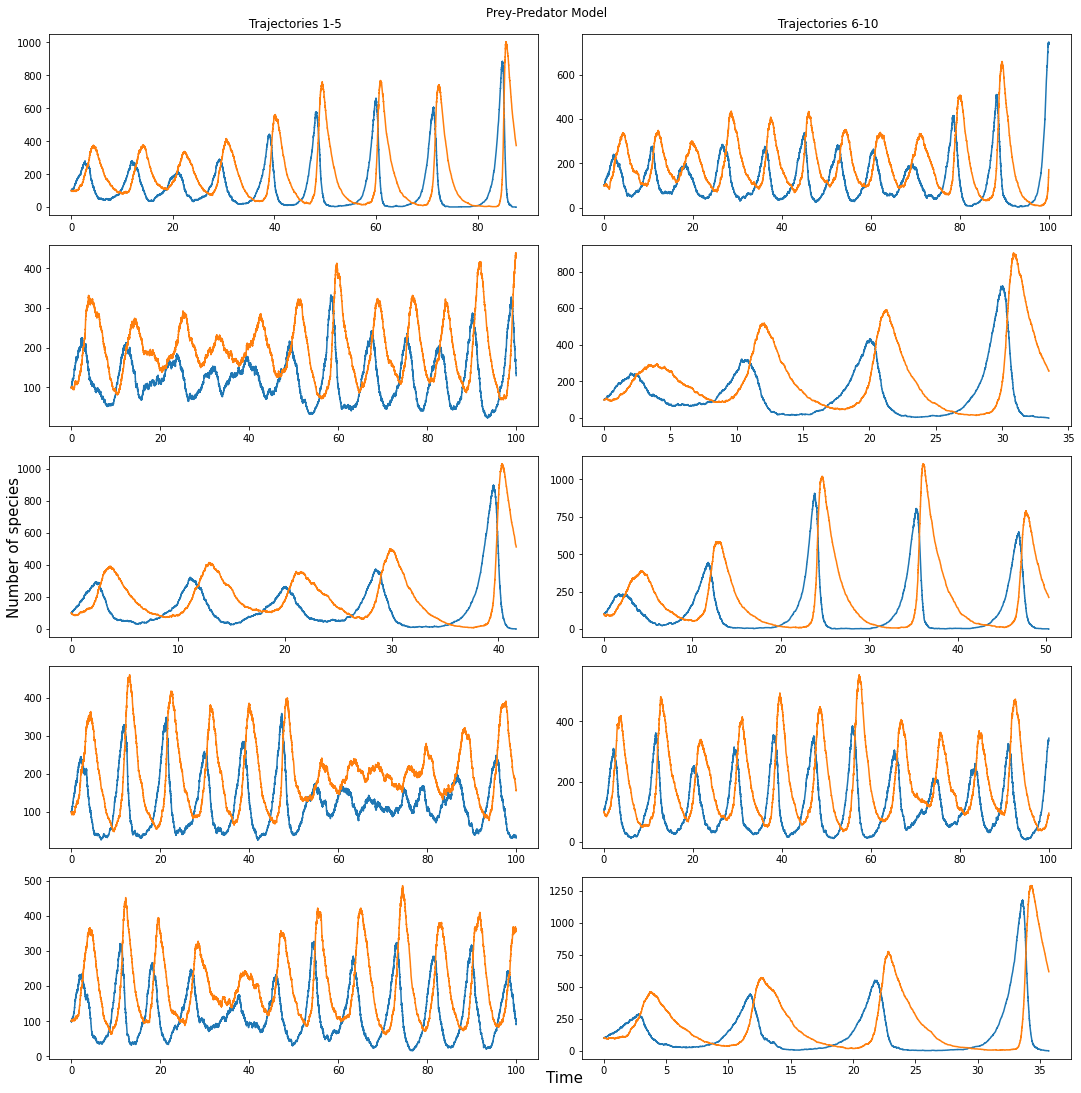

In [4]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15),constrained_layout=False,sharex=False, sharey=False)
fig.suptitle('Prey-Predator Model',y=1)

for r in range(10):
    axes[0,0].set_title(" Trajectories 1-5")
    axes[0,1].set_title(" Trajectories 6-10")
    if r<5:
        axes[r,0].plot(time1[r],prey_tracker1[r],label='prey in trajectory '+str(r))   
        axes[r,0].plot(time1[r],predator_tracker1[r],label='predator in trajectory '+str(r))
        
    else:
        axes[r%5,1].plot(time1[r],prey_tracker1[r],label='prey in trajectory '+str(r))   
        axes[r%5,1].plot(time1[r],predator_tracker1[r],label='predator in trajectory '+str(r))
    
fig.tight_layout()
plt.rcParams.update({'font.size': 15})
fig.text(0.5, 0.001, 'Time', ha='left', va='bottom') #for x label
fig.text(0.001, 0.5, 'Number of species', ha='left', va='center', rotation='vertical')# for y label
plt.show()

In all this trajectories, prey extincts sooner than the predator. (predator also extincts after short period time after extinction of prey)

## Part c

There are three possibility for stationary states:
1. Linearly unstable when we have $c_1>0$ and both species extinct. In this case prey extinct sooner than predator and after a while, the predtor will also extinct ($Y_1=Y_2=0$). 


2. Linearly unstable when we have $c_2>0$ and predator extinct while prey reach explosion state. ($Y_2=0$ and $Y_1=\infty$)

3. The species could coexist with each other (we have $Y_1(t)$ and $Y_2(t)>0$ for all t) and the fixed point would be equal to:$Y_1=\frac{c_1}{c_2}$ and $Y_2=\frac{c_2}{c_2}$

As we see in the next section, by increasing the value of c1 from 0.6 to 1.6 while we keep other paramters constant, we see that in all cases prey extincts sooner than predator.

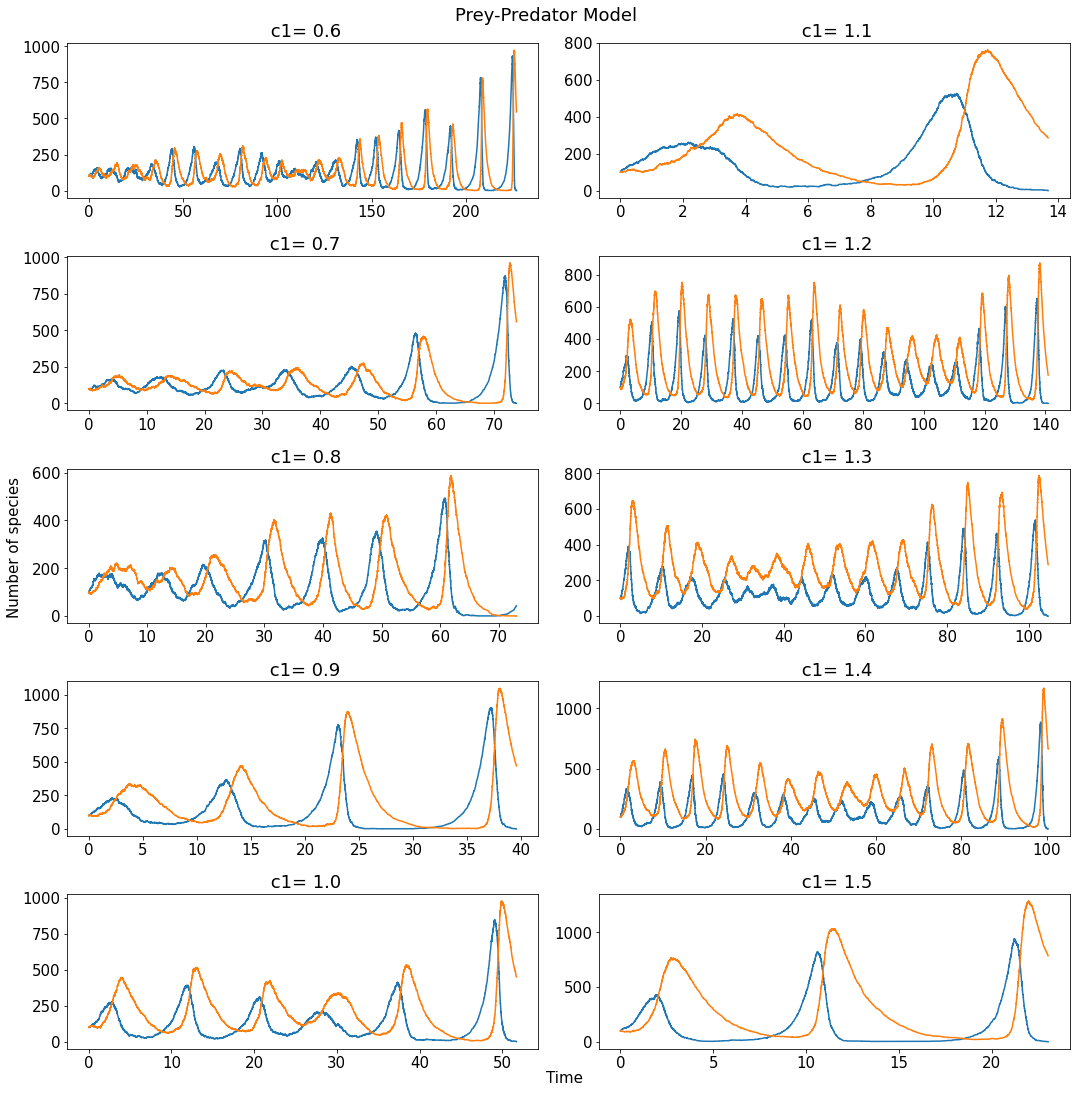

In [5]:
time1c={}
prey_tracker1c={}
predator_tracker1c={}
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15),constrained_layout=False,sharex=False, sharey=False)
fig.suptitle('Prey-Predator Model',y=1)

for r in range(10):
    time1c[r],prey_tracker1c[r],predator_tracker1c[r]=LVM(c1=0.6 +(r/10),c2=0.005,c3=0.6 ,Y1_0=100,Y2_0=100,t=0,T=1000)    
    if r<5:
        axes[r,0].set_title(" c1= "+str(np.round(0.6 +(r/10),1)))
        axes[r,0].plot(time1c[r],prey_tracker1c[r],label='prey in trajectory '+str(r))   
        axes[r,0].plot(time1c[r],predator_tracker1c[r],label='predator in trajectory '+str(r))
        
    else:
        axes[r%5,1].set_title(" c1= "+str(np.round(0.6 +(r/10),1)))
        axes[r%5,1].plot(time1c[r],prey_tracker1c[r],label='prey in trajectory '+str(r))   
        axes[r%5,1].plot(time1c[r],predator_tracker1c[r],label='predator in trajectory '+str(r))
    
fig.tight_layout()
plt.rcParams.update({'font.size': 15})
fig.text(0.5, 0.001, 'Time', ha='left', va='bottom') #for x label
fig.text(0.001, 0.5, 'Number of species', ha='left', va='center', rotation='vertical')# for y label
plt.show()

By increasing the value of c2 from 0.005 to 0.015, we how quickly the prey will extinct.

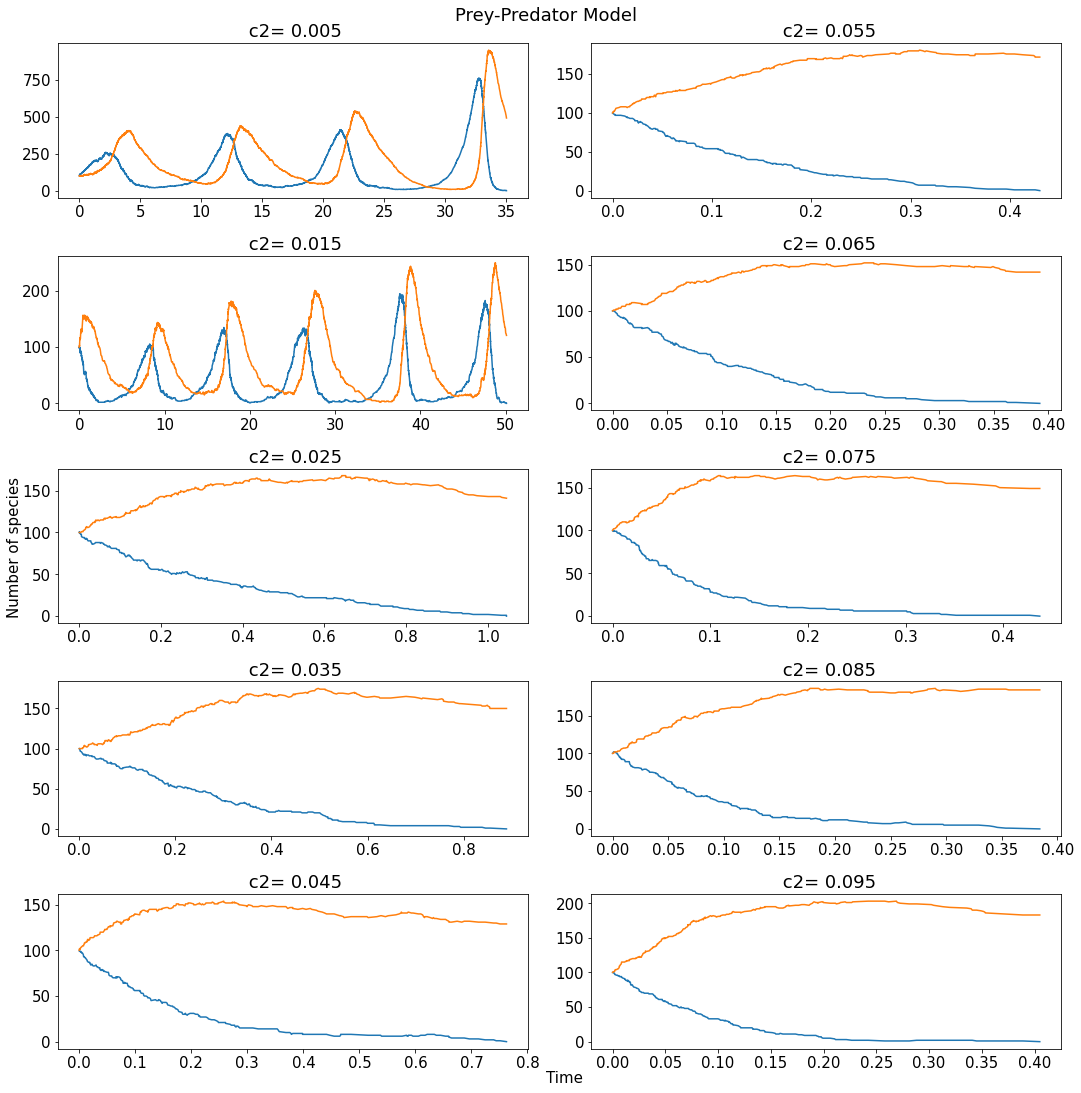

In [6]:
time1c={}
prey_tracker1c={}
predator_tracker1c={}
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15),constrained_layout=False,sharex=False, sharey=False)
fig.suptitle('Prey-Predator Model',y=1)

for r in range(10):
    time1c[r],prey_tracker1c[r],predator_tracker1c[r]=LVM(c1=1 ,c2=0.005+(r/100),c3=0.6 ,Y1_0=100,Y2_0=100,t=0,T=1000)    
    if r<5:
        axes[r,0].set_title(" c2= "+str(np.round(0.005 +(r/100),3)))
        axes[r,0].plot(time1c[r],prey_tracker1c[r],label='prey in trajectory '+str(r))   
        axes[r,0].plot(time1c[r],predator_tracker1c[r],label='predator in trajectory '+str(r))
        
    else:
        axes[r%5,1].set_title(" c2= "+str(np.round(0.005 +(r/100),3)))
        axes[r%5,1].plot(time1c[r],prey_tracker1c[r],label='prey in trajectory '+str(r))   
        axes[r%5,1].plot(time1c[r],predator_tracker1c[r],label='predator in trajectory '+str(r))
    
fig.tight_layout()
plt.rcParams.update({'font.size': 15})
fig.text(0.5, 0.001, 'Time', ha='left', va='bottom') #for x label
fig.text(0.001, 0.5, 'Number of species', ha='left', va='center', rotation='vertical')# for y label
plt.show()

increasing of value c3 will result in extinction of predator sooner than prey. In this case, the explosion of prey in unavoidable

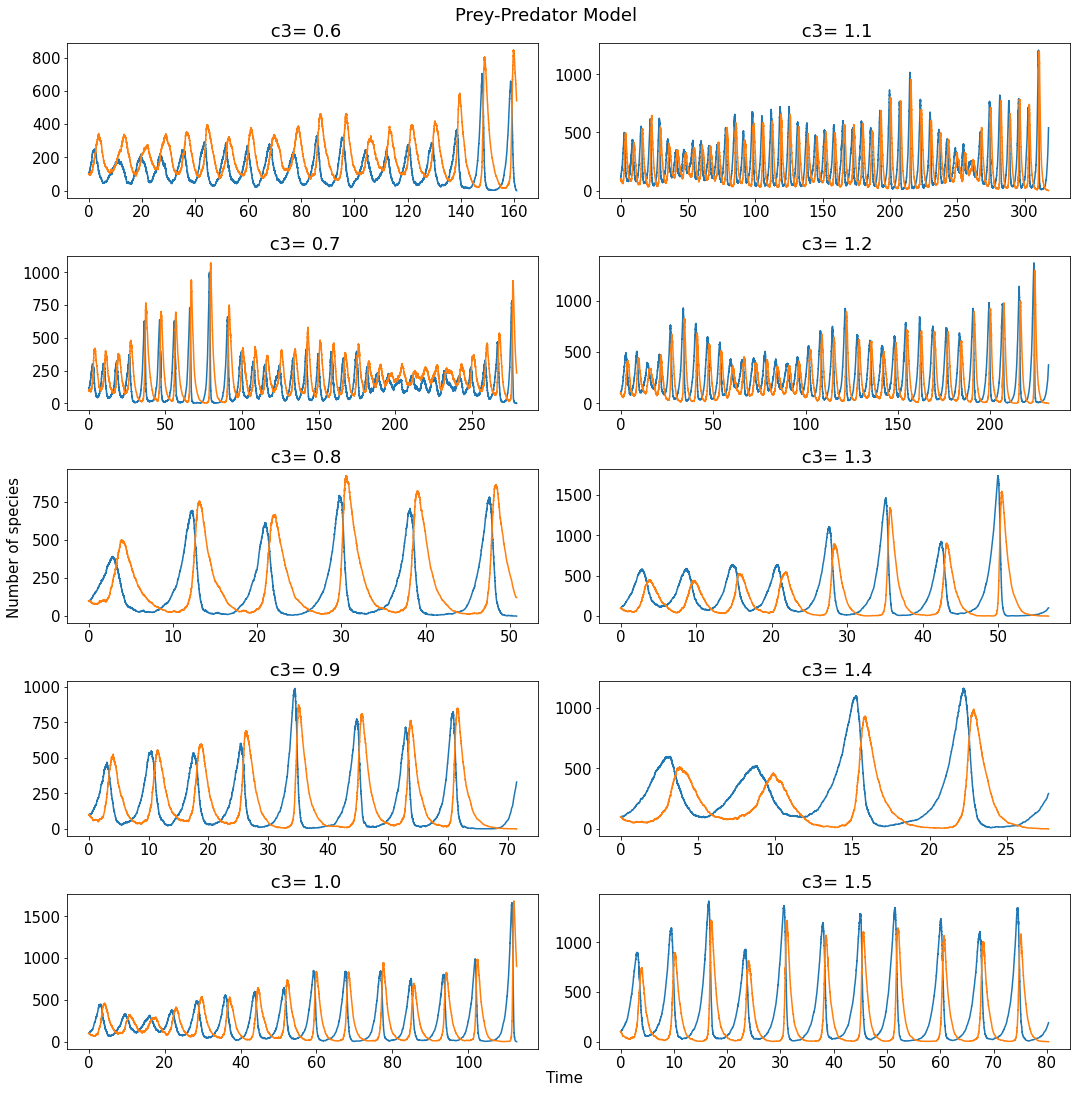

In [7]:
time1c={}
prey_tracker1c={}
predator_tracker1c={}
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15),constrained_layout=False,sharex=False, sharey=False)
fig.suptitle('Prey-Predator Model',y=1)

for r in range(10):
    time1c[r],prey_tracker1c[r],predator_tracker1c[r]=LVM(c1=1 ,c2=0.005,c3=0.6+(r/10) ,Y1_0=100,Y2_0=100,t=0,T=1000)    
    if r<5:
        axes[r,0].set_title(" c3= "+str(np.round(0.6 +(r/10),1)))
        axes[r,0].plot(time1c[r],prey_tracker1c[r],label='prey in trajectory '+str(r))   
        axes[r,0].plot(time1c[r],predator_tracker1c[r],label='predator in trajectory '+str(r))
        
    else:
        axes[r%5,1].set_title(" c3= "+str(np.round(0.6 +(r/10),1)))
        axes[r%5,1].plot(time1c[r],prey_tracker1c[r],label='prey in trajectory '+str(r))   
        axes[r%5,1].plot(time1c[r],predator_tracker1c[r],label='predator in trajectory '+str(r))
    
fig.tight_layout()
plt.rcParams.update({'font.size': 15})
fig.text(0.5, 0.001, 'Time', ha='left', va='bottom') #for x label
fig.text(0.001, 0.5, 'Number of species', ha='left', va='center', rotation='vertical')# for y label
plt.show()

### Conclusion

Increasing parameter c2 make it more likely of extinction of the prey (species 1) sooner than the predator (species 2).

Increasing parameter c3 make it more likely of extinction of the predator (species 2) and explosion of the presy (species 1)

# Question 2

The chemical reaction:

$A$  $\xrightarrow{k}$  $X$ $\xrightarrow{\alpha_1}$ $\varnothing$


$B$  $\xrightarrow{k}$  $Y$ $\xrightarrow{\alpha_2}$ $\varnothing$


$X+Y$ $\xrightarrow{k_\alpha}$  $C$

has the deterministic set of equation as:

$$\frac{d[X]}{dt} = k - \alpha_1[X]-k_\alpha[X][Y] $$

$$\frac{d[Y]}{dt} = k - \alpha_2[Y]-k_\alpha[X][Y] $$

## Part a

To find the fixed point, we set the equations equal to 0:


$$\frac{d[X]}{dt} = k - \alpha_1[X]-k_\alpha[X][Y] = 0 $$

$$\frac{d[Y]}{dt} = k - \alpha_2[Y]-k_\alpha[X][Y] = 0  $$

$$\implies \alpha_1[X]=\alpha_2[Y] \implies [X]=\frac{\alpha_2}{\alpha_1}[Y]$$

If we plug in the value of $[X]=\frac{\alpha_2}{\alpha_1}[Y]$ in the first equation, we will get:

$$ k - \alpha_1[X]-k_\alpha[X][Y] = 0 \implies k - \alpha_1\frac{\alpha_2}{\alpha_1}[Y]-k_\alpha\frac{\alpha_2}{\alpha_1}[Y]^2 = 0 \implies k_\alpha\frac{\alpha_2}{\alpha_1}[Y]^2 +\alpha_2[Y] -k = 0$$

The roots of this equation is equal to:

$$[Y]_{1,2}=\frac{-\alpha_2 \pm \sqrt{\alpha_2^2 + 4k_\alpha\frac{\alpha_2}{\alpha_1}k}}{2k_\alpha\frac{\alpha_2}{\alpha_1}}$$

In [8]:
firsty=(-(10**(-5))+np.sqrt((10**(-10)) + (4*10*(10**(-5))*(10**(-5))/(10**(-6)))))/(2*(10**(-5))*(10**(-5))/(10**(-6)))
print("Y1 = "+str((-(10**(-5))+np.sqrt((10**(-10)) + (4*10*(10**(-5))*(10**(-5))/(10**(-6)))))/(2*(10**(-5))*(10**(-5))/(10**(-6)))))

Y1 = 316.17776996968496


In [9]:
secondy=(-(10**(-5))-np.sqrt((10**(-10)) + (4*10*(10**(-5))*(10**(-5))/(10**(-6)))))/(2*(10**(-5))*(10**(-5))/(10**(-6)))
print("Y2 = "+str((-(10**(-5))-np.sqrt((10**(-10)) + (4*10*(10**(-5))*(10**(-5))/(10**(-6)))))/(2*(10**(-5))*(10**(-5))/(10**(-6)))))

Y2 = -316.2777699696849


Since the value of $[X]$ would $\frac{\alpha_2}{\alpha_1}=10$ times of $[Y]$, the we have:

In [10]:
firstx= 10 * firsty
secondx = 10 * secondy

For the next set of parameters we get also the same answer:

In [11]:
print("second set of parameter Y1 = "+str((-(10**(-3))+np.sqrt((10**(-6)) + (4*(10**3)*(10**(-3))*(10**(-3))/(10**(-4)))))/(2*(10**(-3))*(10**(-3))/(10**(-4)))),\
"second set of parameter Y2 = "+str((-(10**(-3))-np.sqrt((10**(-6)) + (4*(10**3)*(10**(-3))*(10**(-3))/(10**(-4)))))/(2*(10**(-3))*(10**(-3))/(10**(-4)))))

second set of parameter Y1 = 316.177769969685 second set of parameter Y2 = -316.27776996968504


And same as the before, the value of $[X]$, is $\frac{\alpha_2}{\alpha_1}=10$ times of the value of $[Y]$

## Part b 

In [12]:
def Gill2(x=1000,y=10,k=10, alpha1=10**(-6), alpha2=10**(-5),kalpha=10**(-5),t=0,T=100):
    time = [t]  
    X=[x]
    Y=[y]
    while t < T:
        if (x==0 or y==0):
            break
        else :
            a=np.array([])

            rate0=k
            rate1= alpha1 * x
            rate2= alpha2 * y
            rate3= kalpha * x * y  

            a=np.append(a,np.array([rate0,rate1,rate2,rate3]))
            a_sum=np.cumsum(a)  

            t += -np.log(np.random.rand()) / np.max(a_sum)
            time.append(t)

            reaction_index=np.where(a_sum > (np.random.rand() *np.max(a_sum)))[0][0]

            if reaction_index == 0:
                x += 1
                y+= 1
            elif reaction_index == 1:
                x -= 1
            elif reaction_index == 2:
                y -= 1
            elif reaction_index == 3:
                x -= 1
                y -= 1

            X.append(x)
            Y.append(y)
        
    return time,X,Y    

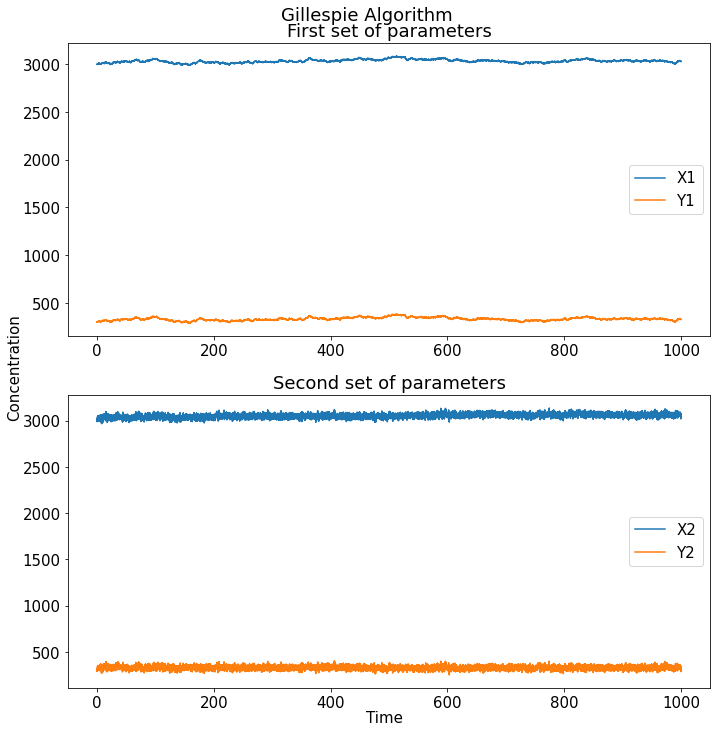

In [13]:
time2b1,X1b,Y1b=Gill2(x=3000,y=300,k=10, alpha1=10**(-6), alpha2=10**(-5),kalpha=10**(-5),t=0,T=1000)

time2b2,X2b,Y2b=Gill2(x=3000,y=300,k=10**3, alpha1=10**(-4), alpha2=10**(-3),kalpha=10**(-3),t=0,T=1000)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10),constrained_layout=False,sharex=False, sharey=False)
fig.suptitle('Gillespie Algorithm',y=1)


axes[0].set_title("First set of parameters" )
axes[0].plot(time2b1,X1b,label='X1')   
axes[0].plot(time2b1,Y1b,label='Y1')
axes[0].legend()       
        
axes[1].set_title("Second set of parameters")
axes[1].plot(time2b2,X2b,label='X2')   
axes[1].plot(time2b2,Y2b,label='Y2')
axes[1].legend()       
   
fig.tight_layout()
plt.rcParams.update({'font.size': 15})
fig.text(0.5, 0.001, 'Time', ha='left', va='bottom') #for x label
fig.text(0.001, 0.5, 'Concentration', ha='left', va='center', rotation='vertical')# for y label
plt.show()

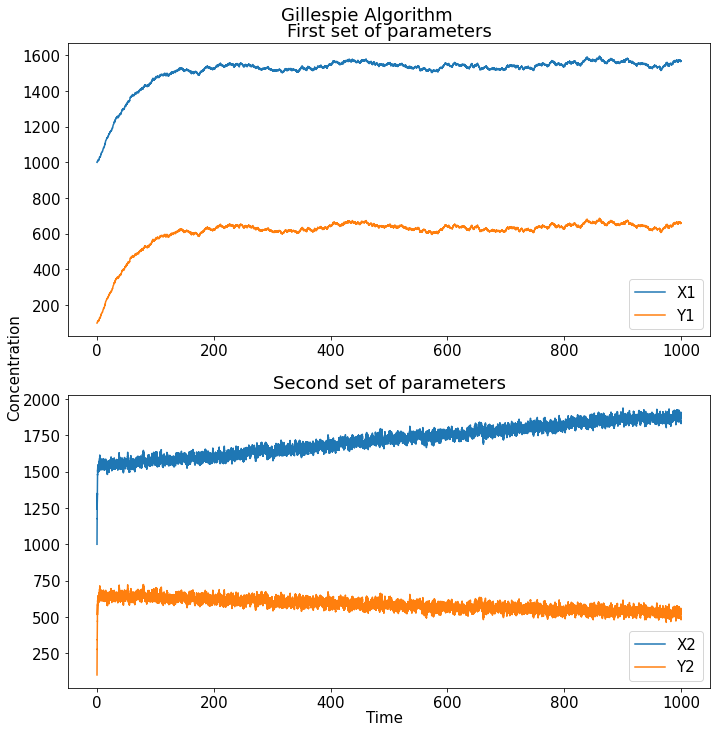

In [14]:
time2b1,X1b,Y1b=Gill2(x=1000,y=100,k=10, alpha1=10**(-6), alpha2=10**(-5),kalpha=10**(-5),t=0,T=1000)

time2b2,X2b,Y2b=Gill2(x=1000,y=100,k=10**3, alpha1=10**(-4), alpha2=10**(-3),kalpha=10**(-3),t=0,T=1000)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10),constrained_layout=False,sharex=False, sharey=False)
fig.suptitle('Gillespie Algorithm',y=1)


axes[0].set_title("First set of parameters" )
axes[0].plot(time2b1,X1b,label='X1')   
axes[0].plot(time2b1,Y1b,label='Y1')
axes[0].legend()       
        
axes[1].set_title("Second set of parameters")
axes[1].plot(time2b2,X2b,label='X2')   
axes[1].plot(time2b2,Y2b,label='Y2')
axes[1].legend()       
   
fig.tight_layout()
plt.rcParams.update({'font.size': 15})
fig.text(0.5, 0.001, 'Time', ha='left', va='bottom') #for x label
fig.text(0.001, 0.5, 'Concentration', ha='left', va='center', rotation='vertical')# for y label
plt.show()

If we start at X=3000 and Y=300 close to the fixed points (which was X=3160 and Y=316), they will stay approximately constant. (X close to 3000 and Y close to 300)
But, if we change the value of X=1000 and Y=100, we see that the value of X and Y rise up and stays around 1500 and 600 respectively for the second set of parameter, and for the second set of parameter, X and Y  again go up quickly to 1500 and 600 respectively but after that X still have increasing the value by time in constrast to Y which goes down gradually.

## Part c

In my point of view, the reason of different behaviour is mostly realted to the value of parameter k, since its increase don't get effected by the value of X and Y in time.  

# Question 3

Deterministic set of equations for mRNA sn protein expression are given by:

$$\frac{dr}{dt} = k_l + \phi(p) - \lambda_rr $$

$$\frac{dp}{dt} = rk_p - \lambda_pp $$

where the function $\phi(p)$ is describing the dependency of the rate of mRNA on protein concentration.

For positive autoregulation we have: $$\phi(p)=\frac{k_0(\frac{p}{K})^n}{1+(\frac{p}{K})^n}$$

And for negative autoregulation we have: $$\phi(p)=\frac{k_0}{1+(\frac{p}{K})^n}$$

## Part a

We have 

$P_{r+1,p}=k_l + \phi(p)$

$P_{r-1,p}=\lambda_rr $

$P_{r,p+1} =rk_p$

$P_{r,p-1} = \lambda_pp $

Therefore, the transition matrix would be:

$T = \begin{pmatrix}
k_l + \phi(p) & \lambda_rr  \\
\lambda_pp & rk_p  
\end{pmatrix}$


## Part b

If  $\phi(p)=\frac{k_0(\frac{p}{K})^n}{1+(\frac{p}{K})^n}$ which gives us  $\phi\prime(p)=\frac{(\frac{nk_0}{p})(\frac{p}{K})^n}{(1+(\frac{p}{K})^n)^2}$

Then, the Jacobian matrix of the equation would be:

$J = \begin{pmatrix}
 \phi\prime(p) & -\lambda_r  \\
-\lambda_p & k_p  
\end{pmatrix} =
\begin{pmatrix}
 \phi\prime(p) & -1  \\
-1 & 1  
\end{pmatrix} $

To find the fixed point of the system, same as before, we set the equations equal to $0$

$\frac{dr}{dt} = k_l + \phi(p) - \lambda_rr = 0 \implies \phi(p) - r = 0$

$\frac{dp}{dt} = rk_p - \lambda_pp  = 0 \implies r - p = 0 \implies r = p$

$\implies \phi(r) = r \implies \frac{(\frac{r}{K})^n}{1+(\frac{r}{K})^n} = r \implies (\frac{r}{K})^n = r + r(\frac{r}{K})^n \implies r^{n+1} - r^n + rK^n = 0 \implies r(r^n - r^{n-1} + K^n) = 0 \implies r = 0=p$

or for $n=1$ and $K=0.5$ we have 

$r  + 0.5 = 0 \implies r= -0.5 = p$

or for $n=10$ and $K=0.5$ we have 

$r^{10}  + 0.5^{10} = 0 \implies r= \sqrt[10]{-.05} $ which does not exist.

For $n=1$ , $r=p=0$ and $K=0.5$ , if we plug in them into Jacobian matrix, we will get:
$J=\begin{pmatrix}
 +1 & -1  \\
-1 & 1  
\end{pmatrix} \implies \lambda_1= 0 , \lambda_2 =2  \implies instability$

For $n=1$ , $r=p=-0.5$ $K=0.5$ , if we plug in them into Jacobian matrix, we will get:
$J=\begin{pmatrix}
 not defined & -1  \\
-1 & 1  
\end{pmatrix} \implies  instability$


## Part c

In [15]:
def Gill3(r=10,p=10,kl=0.01, kp=0.17,lp=0.00028,lr=0.0083,k0=0.01,K=100,n=1,t=0,T=100):
    time = [t]  
    P=[p]
    R=[r]
    while t < T:
        if (p==0 or r==0):
            break
        else :
            a=np.array([])
            
            rate0= kl
            rate1= ((k0)/(1+(p/K)**n))
            rate2= lr * r
            rate3= r* kp  
            rate4 = lp * p

            a=np.append(a,np.array([rate0,rate1,rate2,rate3,rate4]))
            a_sum=np.cumsum(a)  

            t += -np.log(np.random.rand()) / np.max(a_sum)
            time.append(t)

            reaction_index=np.where(a_sum > (np.random.rand() *np.max(a_sum)))[0][0]

            if reaction_index == 0:
                r += 1
            elif reaction_index == 1:
                r += 1
            elif reaction_index == 2:
                r -= 1
            elif reaction_index == 3:
                p += 1
            elif reaction_index == 3:
                p -= 1
            P.append(p)
            R.append(r)
        
    return time,P,R    

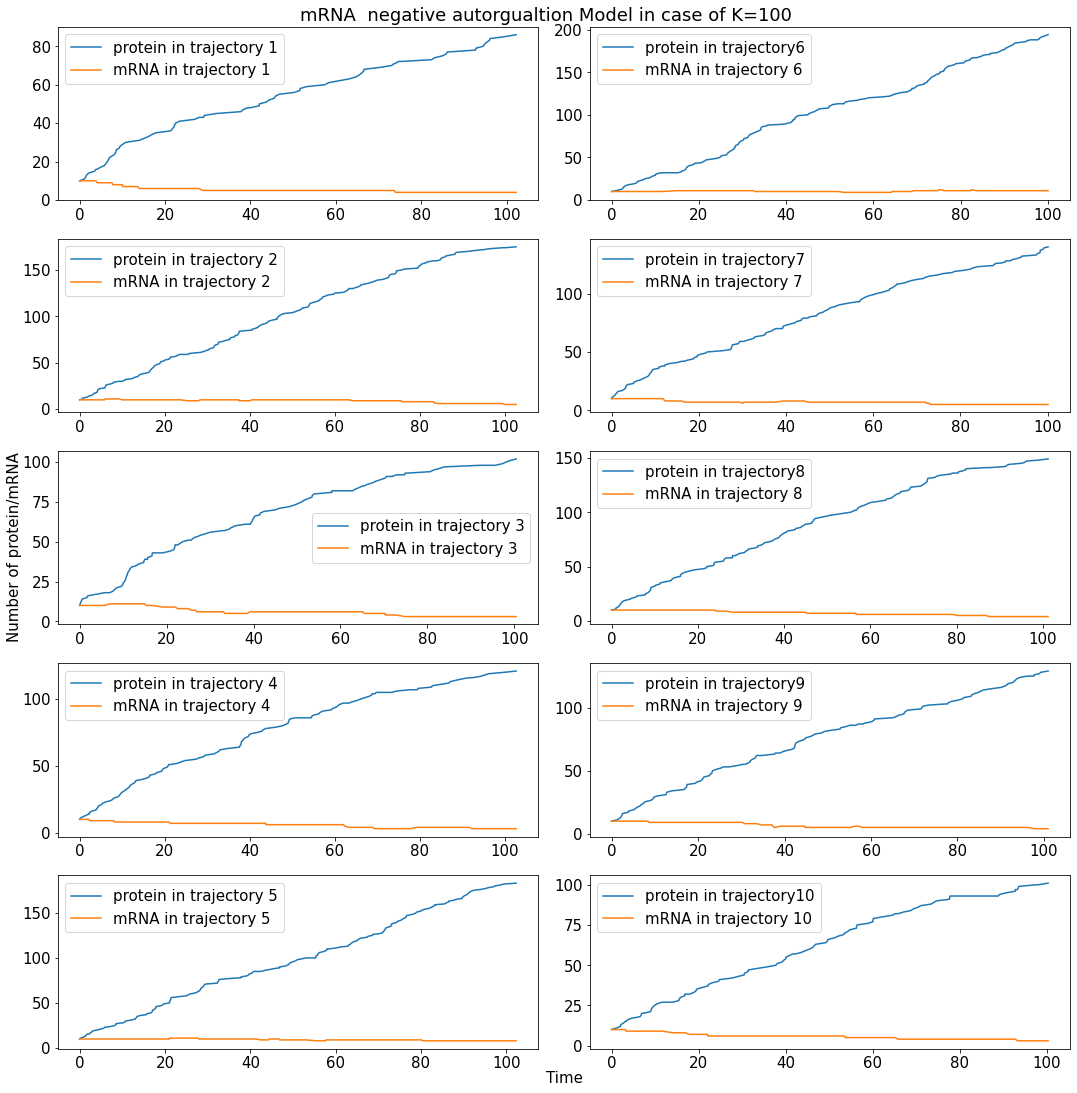

In [16]:
time3c={}
protein3c100={}
mrna3c100={}
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15),constrained_layout=False,sharex=False, sharey=False)
fig.suptitle('mRNA  negative autorgualtion Model in case of K=100',y=1)

for r in range(10):
    time3c[r],protein3c100[r],mrna3c100[r]=Gill3(r=10,p=10,kl=0.01, kp=0.17,lp=0.00028,lr=0.0083,k0=0.01,K=100,n=1,t=0,T=100)    
    if r<5:
#         axes[r,0].set_title()
        axes[r,0].plot(time3c[r],protein3c100[r],label='protein in trajectory '+str(r+1))   
        axes[r,0].plot(time3c[r],mrna3c100[r],label='mRNA in trajectory '+str(r+1))
        axes[r,0].legend()
    else:
#         axes[r%5,1].set_title()
        axes[r%5,1].plot(time3c[r],protein3c100[r],label='protein in trajectory'+str(r+1))   
        axes[r%5,1].plot(time3c[r],mrna3c100[r],label='mRNA in trajectory '+str(r+1))
        axes[r%5,1].legend()    
fig.tight_layout()
plt.rcParams.update({'font.size': 15})
fig.text(0.5, 0.001, 'Time', ha='left', va='bottom') #for x label
fig.text(0.001, 0.5, 'Number of protein/mRNA', ha='left', va='center', rotation='vertical')# for y label
plt.show()

In case of K=100, mRNA degraded while the number of protein goes up.

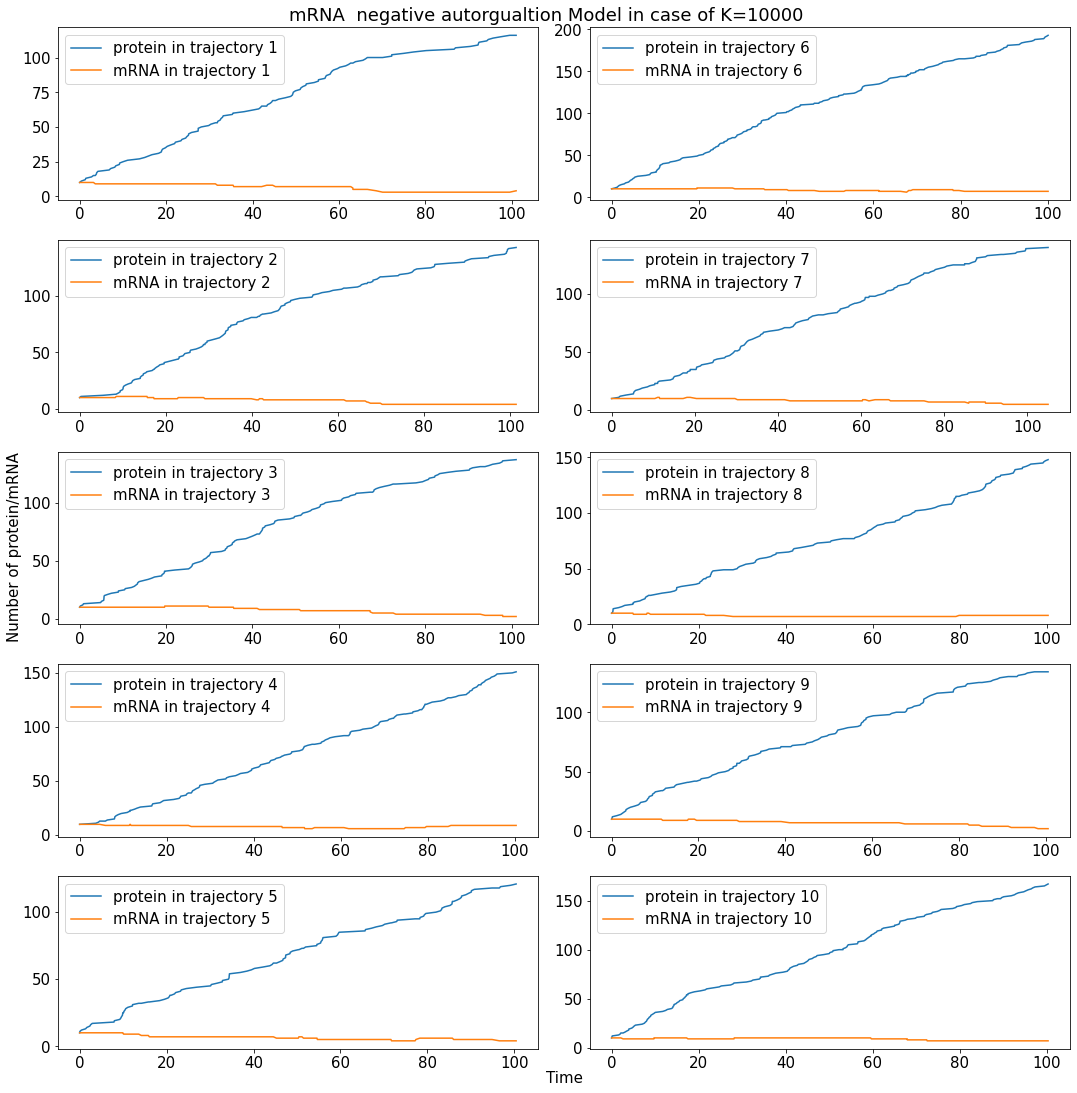

In [17]:
time3c2={}
protein3c10000={}
mrna3c10000={}
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15),constrained_layout=False,sharex=False, sharey=False)
fig.suptitle('mRNA  negative autorgualtion Model in case of K=10000',y=1)

for r in range(10):
    time3c2[r],protein3c10000[r],mrna3c10000[r]=Gill3(r=10,p=10,kl=0.01, kp=0.17,lp=0.00028,lr=0.0083,k0=0.01,K=10000,n=1,t=0,T=100)    
    if r<5:
#         axes[r,0].set_title()
        axes[r,0].plot(time3c2[r],protein3c10000[r],label='protein in trajectory '+str(r+1))   
        axes[r,0].plot(time3c2[r],mrna3c10000[r],label='mRNA in trajectory '+str(r+1))
        axes[r,0].legend()
    else:
#         axes[r%5,1].set_title()
        axes[r%5,1].plot(time3c2[r],protein3c10000[r],label='protein in trajectory '+str(r+1))   
        axes[r%5,1].plot(time3c2[r],mrna3c10000[r],label='mRNA in trajectory '+str(r+1))
        axes[r%5,1].legend()    
fig.tight_layout()
plt.rcParams.update({'font.size': 15})
fig.text(0.5, 0.001, 'Time', ha='left', va='bottom') #for x label
fig.text(0.001, 0.5, 'Number of protein/mRNA', ha='left', va='center', rotation='vertical')# for y label
plt.show()

In both cases for the first trajectory we compute the ratio of $\frac{\sigma}{\mu}$ for the protein:

In [21]:
mu100=np.mean(protein3c100[0])
mu10000=np.mean(protein3c10000[0])

sd100=np.std(protein3c100[0])
sd10000=np.std(protein3c10000[0])

In [22]:
sd100/mu100

0.4657963610849702

In [23]:
sd10000/mu10000

0.4821427672421419

In both cases, the ratio of $\frac{\sigma}{\mu}$ is almost equal and close to $0.5$